In [1]:
import os
from os import path

import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('dataframe_dropped.pkl')

In [3]:
from sklearn.preprocessing import StandardScaler

conditions = df['condition']

columns = [col for col in df.columns if 'condition' not in col and 'replicate' not in col]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [4]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [5]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition
0,-12.982524,-24.785782,high_3
1,22.406212,-11.308654,high_3
2,17.697702,-23.543854,high_3
3,22.990217,3.839096,high_3
4,13.067479,24.148510,high_3
...,...,...,...
2330,-45.447151,-4.696579,control_2
2331,16.914812,-18.044727,control_2
2332,24.429779,-16.688150,control_2
2333,5.120226,16.245657,control_2


In [6]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)


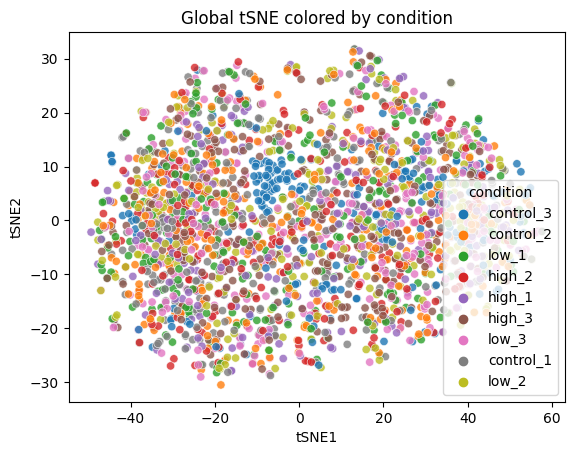

In [7]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='condition', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by condition')
plt.show()

In [24]:
df = pd.read_pickle('dataframe_dropped.pkl')
df[['condition', 'replicate']] = df['condition'].str.split('_', expand=True)

In [25]:
from sklearn.preprocessing import StandardScaler

conditions = df['condition']
replicate = df['replicate']

columns = [col for col in df.columns if 'condition' not in col and 'replicate' not in col]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [26]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [27]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True), replicate.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition,replicate
0,-12.982524,-24.785782,high,3
1,22.406212,-11.308654,high,3
2,17.697702,-23.543854,high,3
3,22.990217,3.839096,high,3
4,13.067479,24.148510,high,3
...,...,...,...,...
2330,-45.447151,-4.696579,control,2
2331,16.914812,-18.044727,control,2
2332,24.429779,-16.688150,control,2
2333,5.120226,16.245657,control,2


In [28]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)


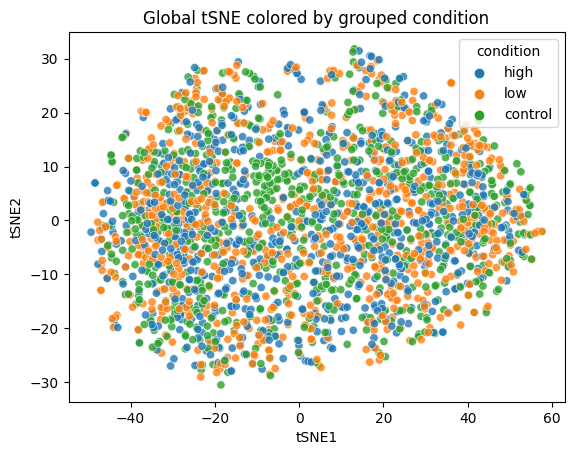

In [29]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='condition', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by grouped condition')
plt.show()

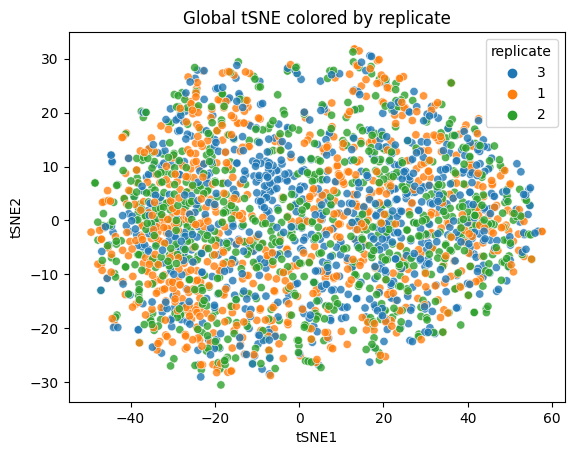

In [30]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='replicate', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by replicate')
plt.show()

In [14]:
one_replicate_data = transformed_data_labeled[transformed_data_labeled['replicate'] == '2']

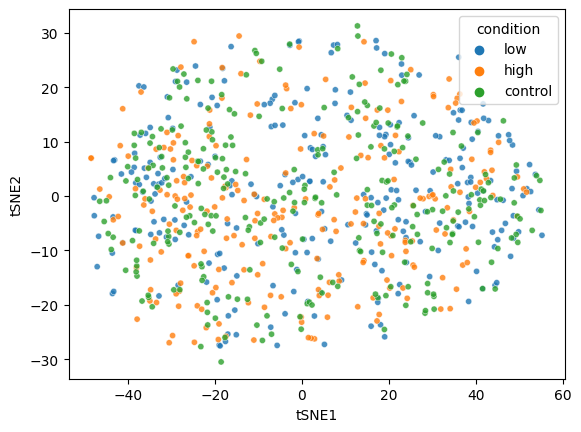

In [15]:
sns.scatterplot(data = one_replicate_data, x = 'Component 1', y = 'Component 2', hue='condition', alpha=0.8, s=20)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [16]:
transformed_data_labeled = transformed_data_labeled[transformed_data_labeled['condition'] != 'low']

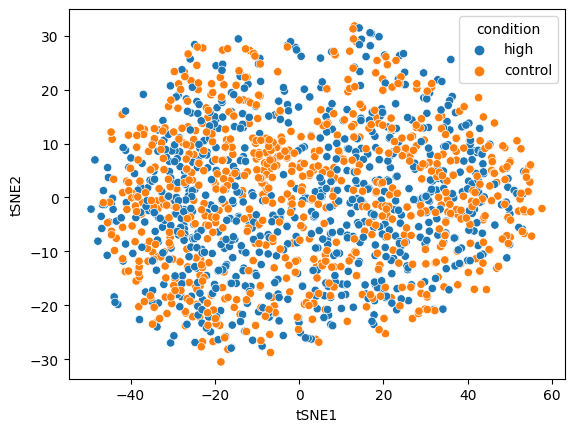

In [17]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='condition')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

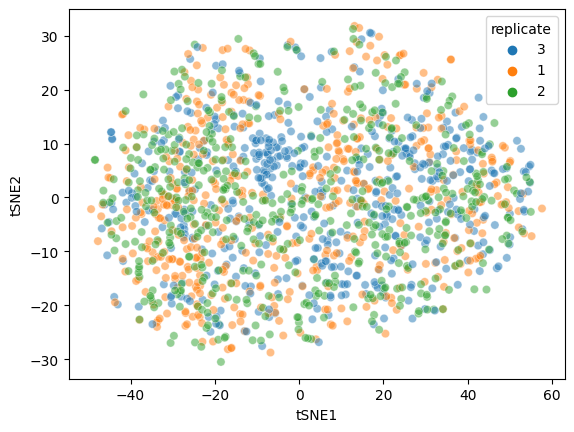

In [18]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='replicate', alpha=0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [19]:
def plot_cluster_check_for_condition(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.manifold import TSNE
    df = df.groupby('condition')
    dfs = {}
    for condition in df.groups.keys():
        df_condition = df.get_group(condition)
        
        replicates = df_condition['replicate']
        
        columns = [col for col in df_condition.columns if ('condition' not in col and 'replicate' not in col)]
        
        scaler = StandardScaler()
        df_condition_normalized = pd.DataFrame(scaler.fit_transform(df_condition[columns]), columns=columns)

        tsne = TSNE(n_components=2, random_state=42)
        tsne_representation = tsne.fit_transform(df_condition_normalized)
        transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

        transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), replicates.reset_index(drop=True)], axis=1, ignore_index=False)
        sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='replicate')
        plt.xlabel('tSNE1')
        plt.ylabel('tSNE2')
        plt.title(condition)
        plt.show()

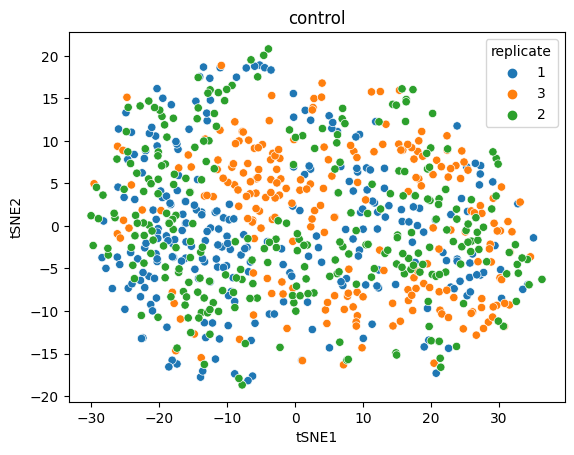

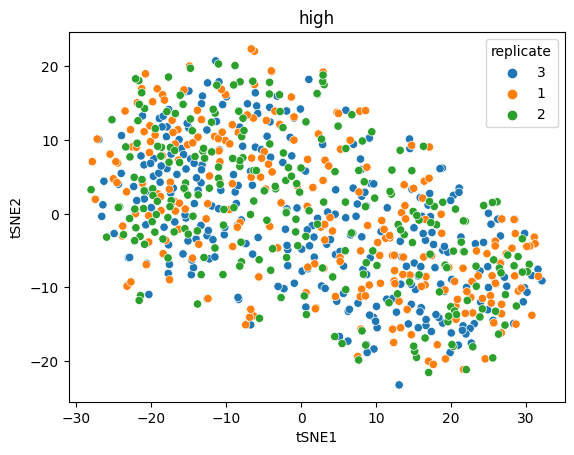

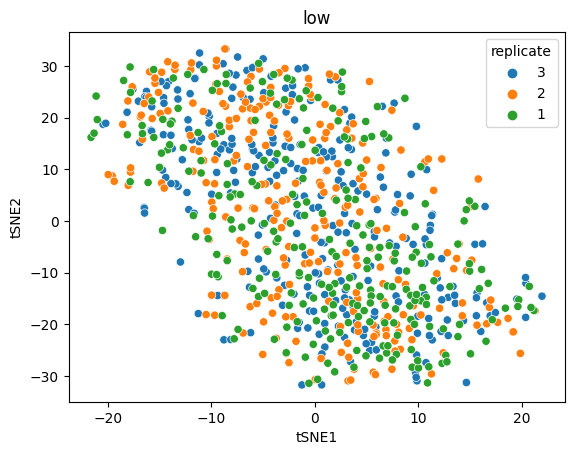

In [20]:
df = pd.read_pickle('dataframe_dropped.pkl')
df[['condition', 'replicate']] = df['condition'].str.split('_', expand=True)
plot_cluster_check_for_condition(df)

<h5>PCA</h5>

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_normalized)
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
transformed_data = pd.DataFrame(pca.transform(df_normalized))

In [22]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), df['condition'].reset_index()], axis=1, ignore_index=False)
transformed_data_labeled

,0,1,2,3,4,5,6,7,8,9,...,966,967,968,969,970,971,972,973,index,condition
0,-18.613782,-14.615315,11.314769,13.827227,12.571621,-3.682756,-2.384984,8.571416,-3.102910,6.808137,...,-1.981245e-18,-1.577366e-17,2.965390e-18,-7.092523e-18,4.901930e-18,1.596685e-18,-6.657977e-19,8.400604e-21,0,high
1,13.262530,-0.965724,-2.441590,3.994665,-4.813850,3.251449,2.381400,2.478797,-0.194502,0.900699,...,4.863944e-18,4.811847e-18,-1.350096e-18,3.813440e-18,-4.287970e-19,-4.113414e-19,9.379879e-20,-4.886398e-21,1,high
2,9.411157,-17.070916,3.083243,6.876550,-4.474209,-1.201607,-3.337317,-0.704622,-13.596452,3.023117,...,5.829532e-18,-5.066415e-19,-2.809362e-19,1.970944e-18,-1.373817e-18,-1.876607e-19,8.299263e-20,-4.064494e-22,2,high
3,16.315081,2.783338,-14.163951,-7.121761,4.340141,10.567617,-0.066369,6.350244,-3.645779,-14.423009,...,-7.517417e-19,5.344712e-18,-2.161293e-18,4.747651e-18,-5.262054e-19,4.193956e-19,4.197142e-19,-1.025675e-20,3,high
4,-5.699596,5.420934,11.331179,4.542916,-1.345789,6.780183,-6.082602,-6.311877,2.234095,-4.309518,...,-1.396903e-18,-2.293898e-18,1.011255e-18,-3.096734e-18,1.110123e-18,2.994808e-19,-2.543620e-19,8.268575e-22,4,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-18.140168,0.571738,2.013804,-8.343134,0.033031,7.085862,3.599079,0.711985,-1.054274,1.222308,...,-5.717922e-18,-1.171894e-17,3.513382e-18,-6.530820e-18,2.016572e-18,4.748551e-19,-3.543876e-19,3.371488e-21,2330,control
2331,-1.345499,-11.194280,-8.198470,-2.332731,-0.220615,0.784355,0.069302,-6.355631,-1.590025,0.383854,...,3.693212e-18,5.013748e-18,-1.316115e-18,1.928786e-18,-1.816753e-18,-5.937925e-19,2.923764e-19,-2.515678e-21,2331,control
2332,7.615050,-11.967531,-10.392224,18.471198,-6.405532,0.325598,-4.217431,-0.358492,0.062344,3.421251,...,6.907471e-18,4.649715e-18,-2.299390e-18,5.194693e-18,-2.152269e-18,-7.864701e-19,3.807952e-19,-3.976315e-21,2332,control
2333,-1.654897,6.025643,10.595188,4.073427,10.734024,-1.034999,-5.836480,4.666059,6.464348,-4.650212,...,-3.944007e-18,-3.201791e-18,5.032501e-19,-2.509967e-18,1.826164e-18,5.430024e-19,-1.898182e-19,2.657835e-22,2333,control


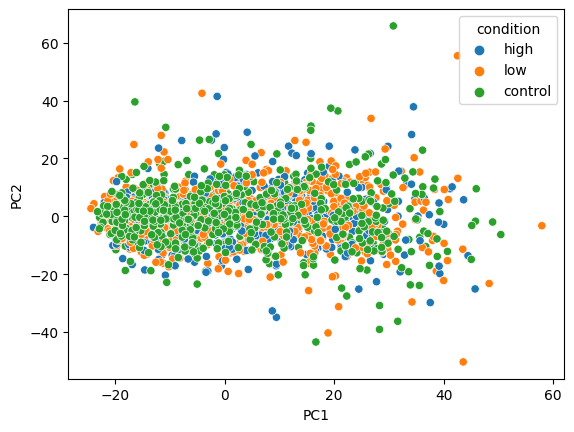

In [23]:
sns.scatterplot(data = transformed_data_labeled, x = 0, y = 1, hue='condition')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()